* 데이터 수집      
https://data.seoul.go.kr/dataList/5/literacyView.do

In [2]:
import numpy as np
import pandas as pd

In [3]:
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

# 필요한 패키지와 라이브러리 가져온다.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

# 폰트 지정하기
plt.rcParams['font.family'] = 'gulim'

# 데이터 확인 및 전처리

## 2021년 공공자전거 대여이력 정보

### 데이터프레임 생성/확인

In [4]:
df1 = pd.read_csv('data/공공자전거 대여이력 정보_2021.01.csv', encoding='cp949', low_memory=False)
df2 = pd.read_csv('data/공공자전거 대여이력 정보_2021.02.csv', encoding='cp949', low_memory=False)
df3 = pd.read_csv('data/공공자전거 대여이력 정보_2021.03.csv', encoding='cp949', low_memory=False)
df4 = pd.read_csv('data/공공자전거 대여이력 정보_2021.04.csv', encoding='cp949', low_memory=False)
df5 = pd.read_csv('data/공공자전거 대여이력 정보_2021.05.csv', encoding='cp949', low_memory=False)
df6 = pd.read_csv('data/공공자전거 대여이력 정보_2021.06.csv', encoding='cp949', low_memory=False)

In [5]:
df6.shape

(3445944, 11)

### 데이터 연결/확인
* concat

In [169]:
# concat
df=pd.concat([df1,df2,df3,df4,df5,df6])

In [170]:
# head
df.head()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-53145,2021-01-02 20:50:36,3,중랑센터,0,2021-01-02 21:15:41,668,서울축산농협(장안지점),0,25.0,0.00
1,SPB-53074,2021-01-04 16:02:12,3,중랑센터,0,2021-01-04 16:17:06,668,서울축산농협(장안지점),0,14.0,0.00
2,SPB-50952,2021-01-13 21:02:05,3,중랑센터,0,2021-01-13 21:14:04,668,서울축산농협(장안지점),0,11.0,1853.99
3,SPB-52380,2021-01-14 21:02:55,3,중랑센터,0,2021-01-14 21:13:41,668,서울축산농협(장안지점),0,10.0,0.00
4,SPB-52380,2021-01-18 18:02:08,3,중랑센터,0,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,0,13.0,2291.05


In [171]:
#tail
df.tail()

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
3445939,SPB-36886,2021-06-30 22:44:14,152,마포구민체육센터 앞,0,2021-07-01 04:48:33,00126,서강대 후문 옆,0,364.0,10153.36
3445940,SPB-30409,2021-06-30 22:45:19,152,마포구민체육센터 앞,0,2021-07-01 04:52:25,00437,대흥역 1번출구,0,367.0,10100.71
3445941,SPB-46230,2021-06-30 22:43:43,152,마포구민체육센터 앞,0,2021-07-01 04:52:27,00437,대흥역 1번출구,0,368.0,430.00
3445942,SPB-41691,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,0,404.0,0.00
3445943,SPB-52274,2021-06-30 22:12:10,2220,반포본동 주민센터 앞,0,2021-07-01 04:55:30,02526,반포경남쇼핑 앞,0,403.0,4541.22


In [172]:
# 데이터 크기
df.shape

(13613873, 11)

In [173]:
# 데이터 정보(사용메모리)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   자전거번호     object 
 1   대여일시      object 
 2   대여 대여소번호  int64  
 3   대여 대여소명   object 
 4   대여거치대     object 
 5   반납일시      object 
 6   반납대여소번호   object 
 7   반납대여소명    object 
 8   반납거치대     int64  
 9   이용시간      float64
 10  이용거리      float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ GB


## 데이터 전처리

### 불필요한 컬럼 제거

In [174]:
# 자전거번호, 대여거치대, 반납거치대 제거

In [175]:
df.drop(columns=['자전거번호','대여거치대','반납거치대'],inplace=True)

### 자료형 확인/변경

In [176]:
# 자료형 확인
df.dtypes

대여일시         object
대여 대여소번호      int64
대여 대여소명      object
반납일시         object
반납대여소번호      object
반납대여소명       object
이용시간        float64
이용거리        float64
dtype: object

In [177]:
# 카테고리형으로 변경  :    대여 대여소번호, 반납대여소번호

In [178]:
df['대여 대여소번호']=df['대여 대여소번호'].astype('category')
df['반납대여소번호']=df['반납대여소번호'].astype('category')

In [179]:
# 메모리 용량 확인

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13613873 entries, 0 to 3445943
Data columns (total 8 columns):
 #   Column    Dtype   
---  ------    -----   
 0   대여일시      object  
 1   대여 대여소번호  category
 2   대여 대여소명   object  
 3   반납일시      object  
 4   반납대여소번호   category
 5   반납대여소명    object  
 6   이용시간      float64 
 7   이용거리      float64 
dtypes: category(2), float64(2), object(4)
memory usage: 779.2+ MB


In [181]:
# datetime형으로 변경 : 대여일시,반납일시

In [182]:
df['대여일시'] = pd.to_datetime(df['대여일시'])
df['반납일시'] = pd.to_datetime(df['반납일시'], errors='coerce')

In [183]:
# 자료형 변경 확인
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호           category
반납대여소명              object
이용시간               float64
이용거리               float64
dtype: object

## 결측치 확인/처리

In [20]:
# 결측치 확인
df.isnull().sum()

자전거번호         0
대여일시          0
대여 대여소번호      0
대여 대여소명       0
대여거치대         0
반납일시          0
반납대여소번호       0
반납대여소명        0
반납거치대         0
이용시간          0
이용거리        269
dtype: int64

In [184]:
# 결측치 제거
df.dropna(inplace=True)

In [185]:
# 결측치 확인
df.isnull().sum()

대여일시        0
대여 대여소번호    0
대여 대여소명     0
반납일시        0
반납대여소번호     0
반납대여소명      0
이용시간        0
이용거리        0
dtype: int64

# 일별 이용 현황

## 대여날짜 컬럼 추가
* date

In [186]:
df['date']=df['대여일시'].dt.date

In [187]:
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,date
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18
...,...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36,2021-06-30
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71,2021-06-30
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00,2021-06-30
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00,2021-06-30


## 대여날짜 별 대여 건수
* groupby
* to_frame

In [189]:
# 대여날짜 별 대여건수 추출
df_count=df[['대여일시']].groupby(df.date).count()
df_count.rename(columns={'대여일시':'대여건수'},inplace=True)
df_count

,대여건수
date,
2021-01-01,22119
2021-01-02,23463
2021-01-03,21656
2021-01-04,32732
2021-01-05,28819
...,...
2021-06-26,105414
2021-06-27,92486
2021-06-28,105882


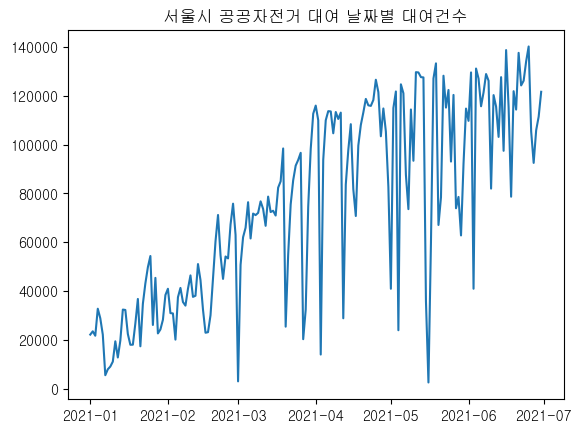

In [190]:
# 대여날짜 별 대여건수 시각화
plt.plot(df_count.index,df_count.values)
plt.title('서울시 공공자전거 대여 날짜별 대여건수')
plt.show()

## 대여날짜 별 이용시간
* groupby
* to_frame

In [191]:
# 대여날짜 별 이용시간 추출
df_time=df['이용시간'].groupby(df.date).sum().to_frame()
df_time

,이용시간
date,
2021-01-01,692309.0
2021-01-02,686580.0
2021-01-03,609571.0
2021-01-04,750721.0
2021-01-05,610227.0
...,...
2021-06-26,3168288.0
2021-06-27,2706168.0
2021-06-28,2405249.0


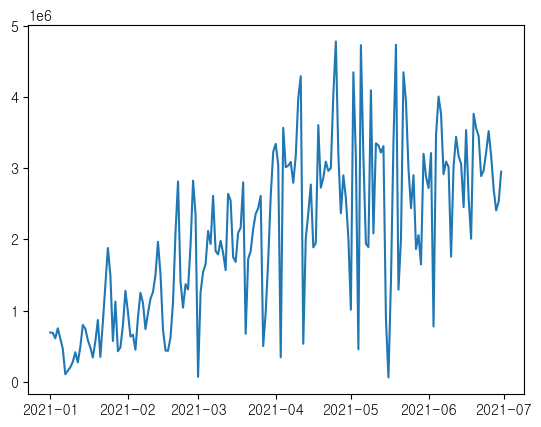

In [192]:
# 대여날짜 별 이용시간 시각화
plt.plot(df_time.index,df_time['이용시간'])
plt.show()

## 대여날짜 별 이용 거리

In [193]:
# 대여날짜 별 이용거리 추출
df_diatance=df['이용거리'].groupby(df.date).sum()
df_diatance

date
2021-01-01    4.613529e+07
2021-01-02    4.409618e+07
2021-01-03    4.059830e+07
2021-01-04    5.249645e+07
2021-01-05    6.944856e+07
                  ...     
2021-06-26    3.635015e+08
2021-06-27    3.078146e+08
2021-06-28    2.828124e+08
2021-06-29    3.031029e+08
2021-06-30    3.395277e+08
Name: 이용거리, Length: 181, dtype: float64

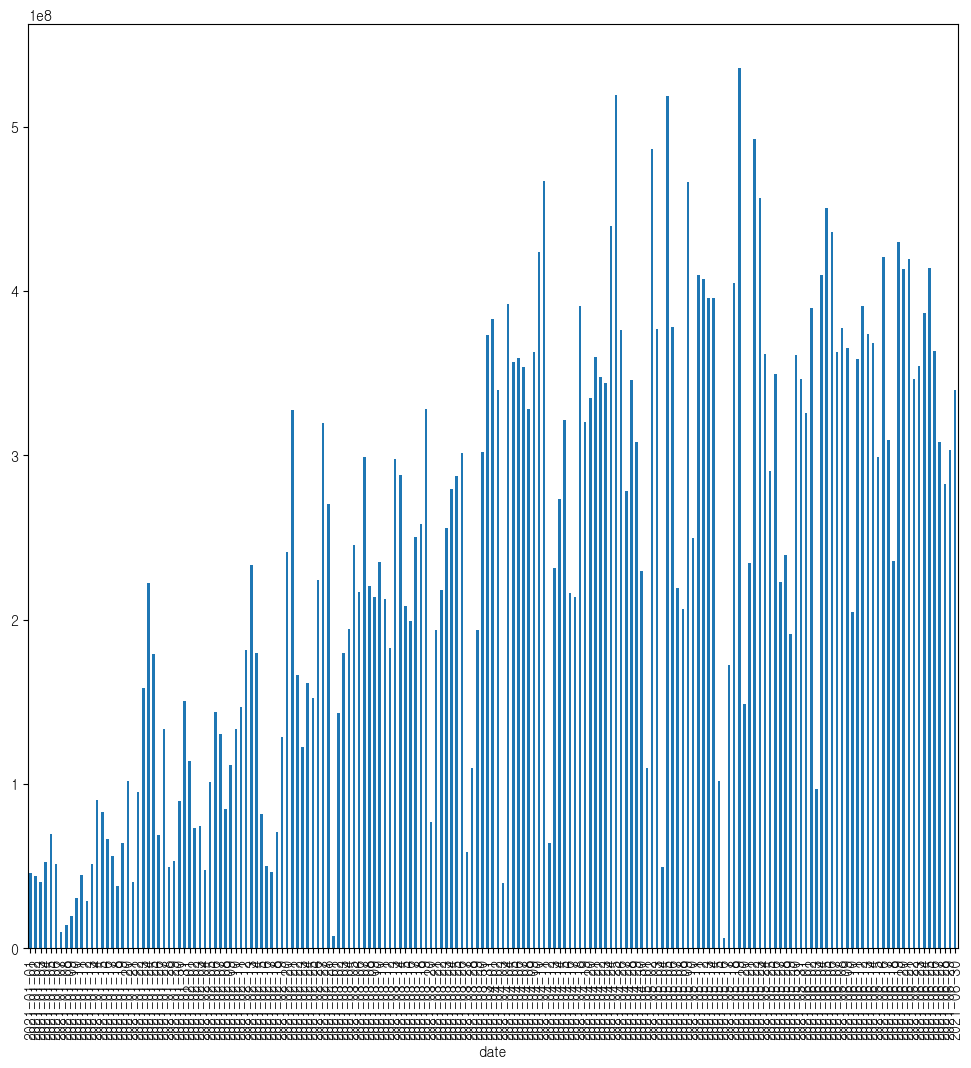

In [194]:
# 대여날짜 별 이용거리 시각화
df_diatance.plot(kind='bar',figsize=(12,12))
plt.show()

## 데이터프레임 합치기

In [195]:
df_total=pd.concat([df_count,df_time,df_diatance],axis=1)
df_total

,대여건수,이용시간,이용거리
date,,,
2021-01-01,22119,692309.0,4.613529e+07
2021-01-02,23463,686580.0,4.409618e+07
2021-01-03,21656,609571.0,4.059830e+07
2021-01-04,32732,750721.0,5.249645e+07
2021-01-05,28819,610227.0,6.944856e+07
...,...,...,...
2021-06-26,105414,3168288.0,3.635015e+08
2021-06-27,92486,2706168.0,3.078146e+08
2021-06-28,105882,2405249.0,2.828124e+08


# 시간대별 대여/반납 현황

## 대여시간, 반납시간 컬럼 추가

In [196]:
df['대여시간']=df['대여일시'].dt.hour

In [197]:
df['반납시간']=df['반납일시'].dt.hour

In [198]:
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,date,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18
...,...,...,...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,00126,서강대 후문 옆,364.0,10153.36,2021-06-30,22,4
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,00437,대흥역 1번출구,367.0,10100.71,2021-06-30,22,4
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,00437,대흥역 1번출구,368.0,430.00,2021-06-30,22,4
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,02526,반포경남쇼핑 앞,404.0,0.00,2021-06-30,22,4


## 시간대별 대여/반납 현황

In [199]:
# 시간대별 대여현황
df_lease_time=df[['자전거번호']].groupby(df.대여시간).count()
df_lease_time.rename(columns={'자전거번호':'대여건수'},inplace=True)
df_lease_time

KeyError: "None of [Index(['자전거번호'], dtype='object')] are in the [columns]"

In [200]:
# 시간대별 반납현황
df_return_time=df[['자전거번호']].groupby(df.반납시간).count()
df_return_time.rename(columns={'자전거번호':'반납건수'},inplace=True)
df_return_time

KeyError: "None of [Index(['자전거번호'], dtype='object')] are in the [columns]"

## 시각화

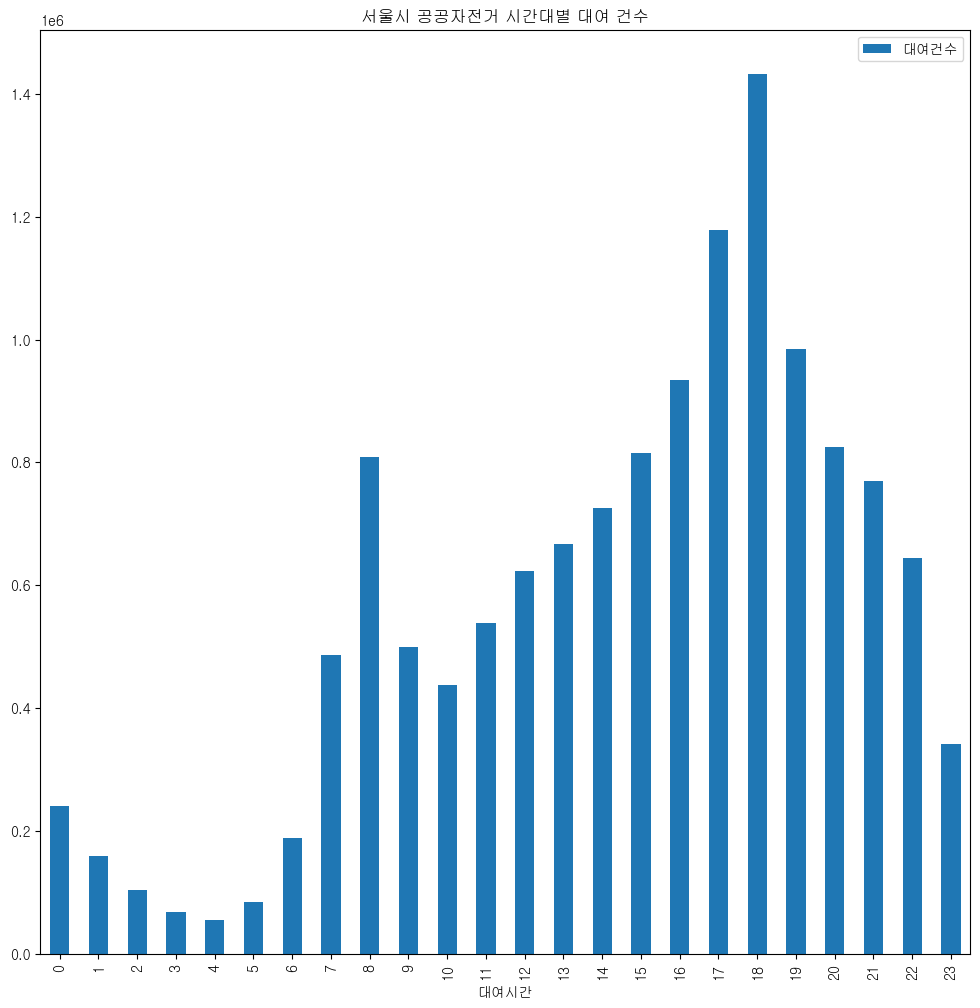

In [201]:
# 시간대별 공공자전거 대여건수 시각화
df_lease_time.plot(kind='bar',figsize=(12,12))
plt.title('서울시 공공자전거 시간대별 대여 건수')
plt.show()

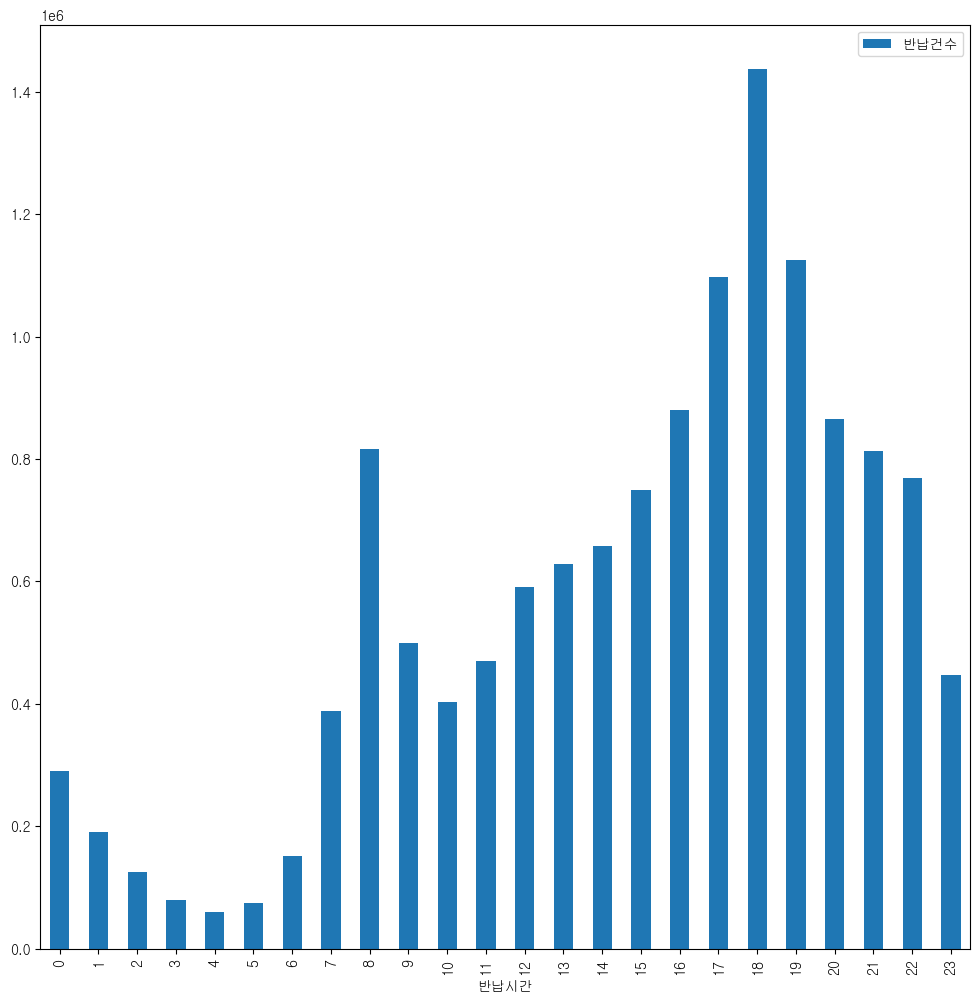

In [202]:
# 시간대별 공공자전거 반납건수 시각화
df_return_time.plot(kind='bar',figsize=(12,12))
plt.show()

# 대여소별 대여/반납 현황

## 대여소 현황

In [203]:
# 대여 대여소번호 갯수
df['대여 대여소번호'].unique()

[3, 5, 10, 101, 102, ..., 3638, 4588, 3640, 3811, 4322]
Length: 2493
Categories (2493, int64): [3, 5, 10, 101, ..., 9999, 88888, 99997, 99999]

In [204]:
# 반납대여소번호 갯수
df['반납대여소번호'].unique()

[668, 540, 594, 529, 646, ..., '03636', '03638', '03640', '04588', '03811']
Length: 4674
Categories (4811, object): [3, 10, 101, 102, ..., '화랑대역 2번출구 앞', '휘경sk뷰아파트 앞', '휘경여중고삼거리', '흑석역 4번출구']

In [205]:
# 반납대여소 번호 처리 (str형으로 변환)
df['반납대여소번호'] = df['반납대여소번호'].astype(str)
df.dtypes

대여일시        datetime64[ns]
대여 대여소번호          category
대여 대여소명             object
반납일시        datetime64[ns]
반납대여소번호             object
반납대여소명              object
이용시간               float64
이용거리               float64
date                object
대여시간                 int64
반납시간                 int64
dtype: object

In [207]:
# 반납대여소 번호 처리 (왼쪽의 '0' 제거)
df['반납대여소번호'] = df['반납대여소번호'].str.lstrip('0')
df

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,date,대여시간,반납시간
0,2021-01-02 20:50:36,3,중랑센터,2021-01-02 21:15:41,668,서울축산농협(장안지점),25.0,0.00,2021-01-02,20,21
1,2021-01-04 16:02:12,3,중랑센터,2021-01-04 16:17:06,668,서울축산농협(장안지점),14.0,0.00,2021-01-04,16,16
2,2021-01-13 21:02:05,3,중랑센터,2021-01-13 21:14:04,668,서울축산농협(장안지점),11.0,1853.99,2021-01-13,21,21
3,2021-01-14 21:02:55,3,중랑센터,2021-01-14 21:13:41,668,서울축산농협(장안지점),10.0,0.00,2021-01-14,21,21
4,2021-01-18 18:02:08,3,중랑센터,2021-01-18 18:15:22,540,군자역 7번출구 베스트샵 앞,13.0,2291.05,2021-01-18,18,18
...,...,...,...,...,...,...,...,...,...,...,...
3445939,2021-06-30 22:44:14,152,마포구민체육센터 앞,2021-07-01 04:48:33,126,서강대 후문 옆,364.0,10153.36,2021-06-30,22,4
3445940,2021-06-30 22:45:19,152,마포구민체육센터 앞,2021-07-01 04:52:25,437,대흥역 1번출구,367.0,10100.71,2021-06-30,22,4
3445941,2021-06-30 22:43:43,152,마포구민체육센터 앞,2021-07-01 04:52:27,437,대흥역 1번출구,368.0,430.00,2021-06-30,22,4
3445942,2021-06-30 22:11:14,2220,반포본동 주민센터 앞,2021-07-01 04:55:29,2526,반포경남쇼핑 앞,404.0,0.00,2021-06-30,22,4


In [ ]:
# 반납대여소 번호 처리 (int형으로 변환)

In [ ]:
# 반납대여소 번호 처리 (category형으로 변환)

## 대여건수가 가장 많은 대여소 best10

In [117]:
# value_counts
df.value_counts(['대여 대여소명']).head(10)

대여 대여소명          
여의나루역 1번출구 앞         68994
뚝섬유원지역 1번출구 앞        68588
마포구민체육센터 앞           43535
봉림교 교통섬              43368
롯데월드타워(잠실역2번출구 쪽)    37149
마곡나루역 2번 출구          36988
신대방역 2번 출구           31971
당산육갑문                31527
IFC몰                 31443
옥수역 3번출구             29811
dtype: int64

## 반납건수가 가장 많은 대여소 best10

In [118]:
# value_counts
df.value_counts(['반납대여소명']).head(10)

반납대여소명           
뚝섬유원지역 1번출구 앞        78958
여의나루역 1번출구 앞         68966
마포구민체육센터 앞           50607
봉림교 교통섬              44572
롯데월드타워(잠실역2번출구 쪽)    37344
마곡나루역 2번 출구          36876
당산육갑문                34276
IFC몰                 33758
신대방역 2번 출구           33159
옥수역 3번출구             32381
dtype: int64

## 여의나루역 1번출구 앞 대여소 이용현황

### 서브셋 만들기

In [208]:
df_yenr=df[df['대여 대여소명']=='여의나루역 1번출구 앞']
df_yenr

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,이용시간,이용거리,date,대여시간,반납시간
45838,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,2021-01-01 01:16:29,201,진미파라곤 앞,10.0,0.00,2021-01-01,1,1
45839,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,2021-01-01 04:48:23,493,홍대입구역 6번출구,19.0,0.00,2021-01-01,4,4
45840,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,2021-01-01 09:45:33,223,진주아파트상가 앞,6.0,877.23,2021-01-01,9,9
45841,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,27.0,0.00,2021-01-01,10,11
45842,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,17.0,0.00,2021-01-01,11,11
...,...,...,...,...,...,...,...,...,...,...,...
3445365,2021-06-30 22:34:23,207,여의나루역 1번출구 앞,2021-07-01 00:12:03,4526,목동아파트2단지 222동 앞,97.0,9268.32,2021-06-30,22,0
3445420,2021-06-30 22:36:03,207,여의나루역 1번출구 앞,2021-07-01 00:12:31,1148,볏골공원,96.0,10957.26,2021-06-30,22,0
3445452,2021-06-30 22:36:11,207,여의나루역 1번출구 앞,2021-07-01 00:12:44,704,남부법원검찰청 교차로,96.0,11358.59,2021-06-30,22,0
3445463,2021-06-30 22:53:04,207,여의나루역 1번출구 앞,2021-07-01 00:12:47,207,여의나루역 1번출구 앞,80.0,0.00,2021-06-30,22,0


### 반납 현황

In [123]:
# value_counts
df_yenr.value_counts(['반납대여소명']).head(10)

반납대여소명      
여의나루역 1번출구 앞    18347
국민일보 앞           2006
시범아파트버스정류장 옆     1588
여의도중학교 옆         1525
당산육갑문            1269
여의도초교 앞          1209
IFC몰             1063
여의도고교 앞           986
NH농협은행 앞          979
마포역 4번출구 뒤        796
dtype: int64

### 요일별 대여현황

In [135]:
#요일컬럼 추가 : strftime('%a')
df_yenr['요일']=df_yenr['대여일시'].apply(lambda x : x.strftime('%a'))
df_yenr

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_3288\254763973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_yenr['요일']=df_yenr['대여일시'].apply(lambda x : x.strftime('%a'))


,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리,date,대여시간,반납시간,요일
45838,SPB-50367,2021-01-01 01:05:49,207,여의나루역 1번출구 앞,0,2021-01-01 01:16:29,201,진미파라곤 앞,0,10.0,0.00,2021-01-01,1,1,Fri
45839,SPB-38650,2021-01-01 04:28:45,207,여의나루역 1번출구 앞,0,2021-01-01 04:48:23,493,홍대입구역 6번출구,0,19.0,0.00,2021-01-01,4,4,Fri
45840,SPB-30379,2021-01-01 09:39:23,207,여의나루역 1번출구 앞,0,2021-01-01 09:45:33,223,진주아파트상가 앞,0,6.0,877.23,2021-01-01,9,9,Fri
45841,SPB-53499,2021-01-01 10:50:10,207,여의나루역 1번출구 앞,0,2021-01-01 11:17:49,207,여의나루역 1번출구 앞,0,27.0,0.00,2021-01-01,10,11,Fri
45842,SPB-51898,2021-01-01 11:01:44,207,여의나루역 1번출구 앞,0,2021-01-01 11:19:02,207,여의나루역 1번출구 앞,0,17.0,0.00,2021-01-01,11,11,Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445365,SPB-44042,2021-06-30 22:34:23,207,여의나루역 1번출구 앞,0,2021-07-01 00:12:03,04526,목동아파트2단지 222동 앞,0,97.0,9268.32,2021-06-30,22,0,Wed
3445420,SPB-34806,2021-06-30 22:36:03,207,여의나루역 1번출구 앞,0,2021-07-01 00:12:31,01148,볏골공원,0,96.0,10957.26,2021-06-30,22,0,Wed
3445452,SPB-31846,2021-06-30 22:36:11,207,여의나루역 1번출구 앞,0,2021-07-01 00:12:44,00704,남부법원검찰청 교차로,0,96.0,11358.59,2021-06-30,22,0,Wed
3445463,SPB-34645,2021-06-30 22:53:04,207,여의나루역 1번출구 앞,0,2021-07-01 00:12:47,00207,여의나루역 1번출구 앞,0,80.0,0.00,2021-06-30,22,0,Wed


In [136]:
# value_counts
df_yenr.value_counts('요일')

요일
Sun    14454
Sat    10932
Wed    10755
Fri     9191
Mon     8391
Thu     8036
Tue     7235
dtype: int64

### 이용시간 통계

In [131]:
# 이용시간 평균
df_yenr['이용시간'].mean()

50.285879931588255

In [132]:
# 이용시간 최대
df_yenr['이용시간'].max()

1268.0

In [133]:
# 이용시간 최소
df_yenr['이용시간'].min()

1.0

In [130]:
# 전체데이터 이용시간 평균
df['이용시간'].mean()

27.27823322905529